In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [14]:
file_path = "/home/mtech_fde/Sarvesh_Projects/EX 7/diabetes.csv"
data = pd.read_csv(file_path)

In [18]:
#Calculate measures of variability

variability_measures = {}

for col in data.columns:
    if np.issubdtype(data[col].dtype, np.number):
        variance = np.var(data[col], ddof=1)
        mean = np.mean(data[col])
        std_dev = np.std(data[col], ddof=1)
        coeff_var = (std_dev / mean) * 100 if mean != 0 else np.nan
        iqr = np.percentile(data[col], 75) - np.percentile(data[col], 25)
        skewness_val = skew(data[col], nan_policy='omit')
        
        variability_measures[col] = {
            "Variance": variance,
            "Coefficient of Variation (%)": coeff_var,
            "Interquartile Range (IQR)": iqr,
            "Skewness": skewness_val
        }

# Convert to DataFrame
variability_df = pd.DataFrame(variability_measures).T
print("\n=== Measures of Variability ===\n")
variability_df


=== Measures of Variability ===



,Variance,Coefficient of Variation (%),Interquartile Range (IQR),Skewness
Pregnancies,11.354056,87.634133,5.0000,0.899912
Glucose,1022.248314,26.446703,41.2500,0.173414
BloodPressure,374.647271,28.009082,18.0000,-1.840005
SkinThickness,254.473245,77.677549,32.0000,0.109159
Insulin,13281.180078,144.416986,127.2500,2.267810
BMI,62.159984,24.643717,9.3000,-0.428143
DiabetesPedigreeFunction,0.109779,70.215138,0.3825,1.916159
Age,138.303046,35.378816,17.0000,1.127389
Outcome,0.227483,136.678604,1.0000,0.633776


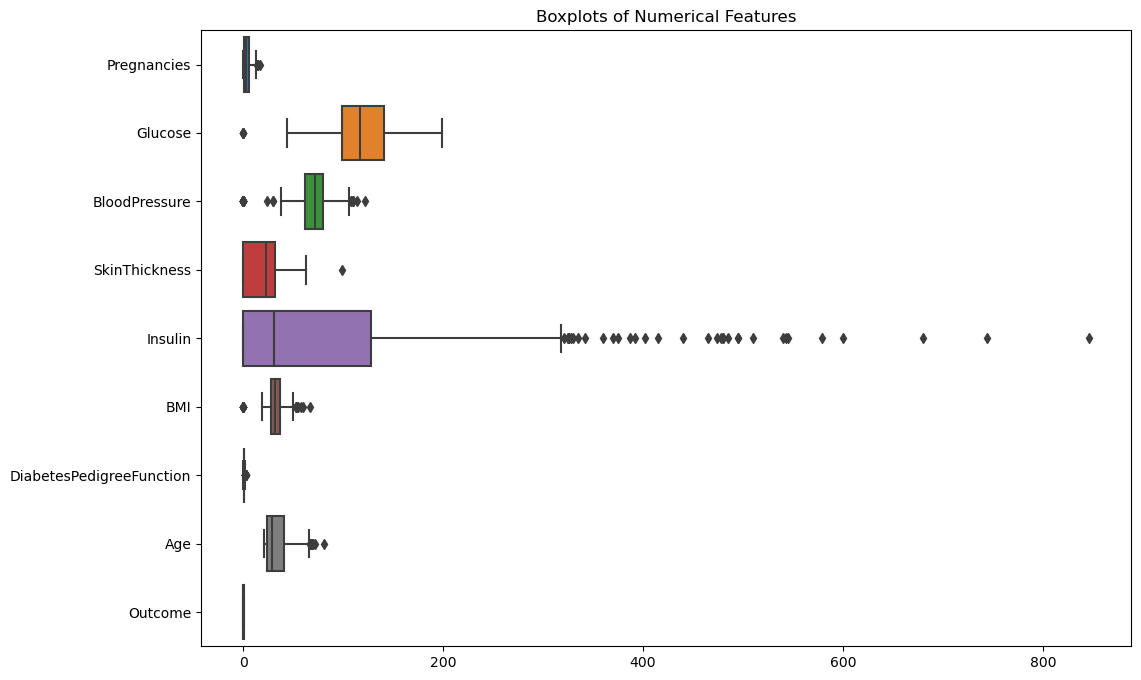

In [21]:
#Boxplot for all numeric features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient="h")
plt.title("Boxplots of Numerical Features")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


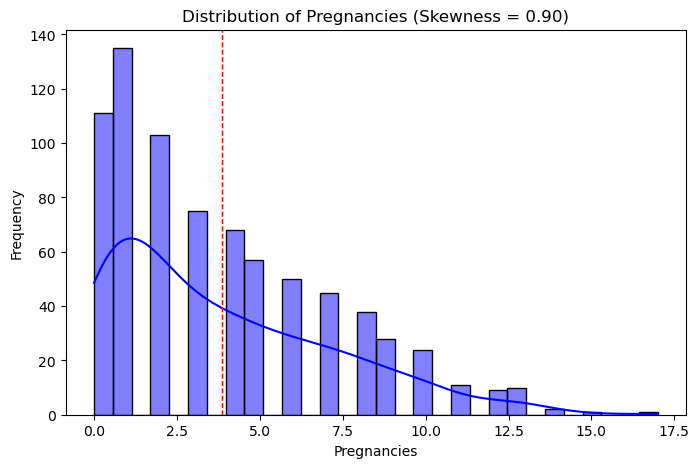

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


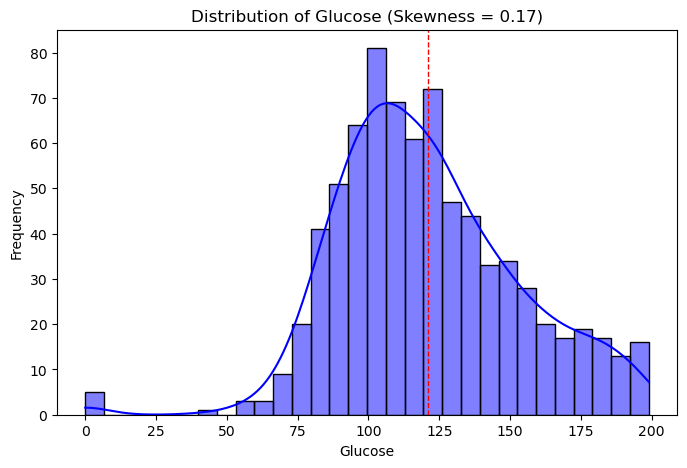

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


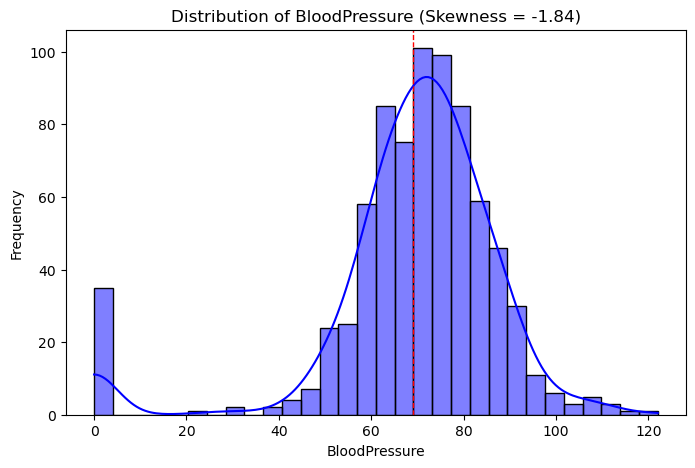

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


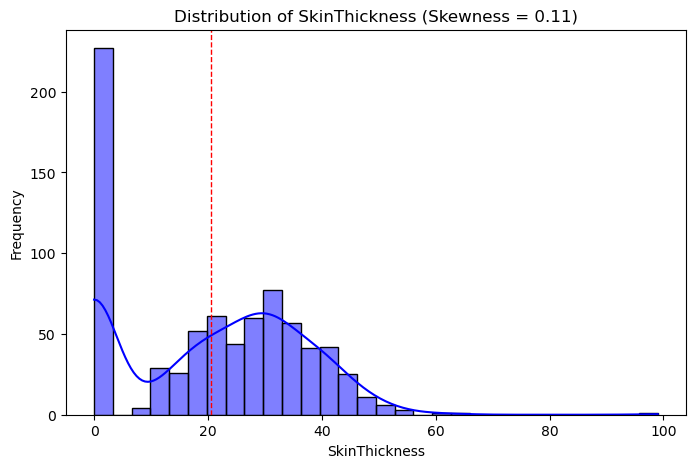

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


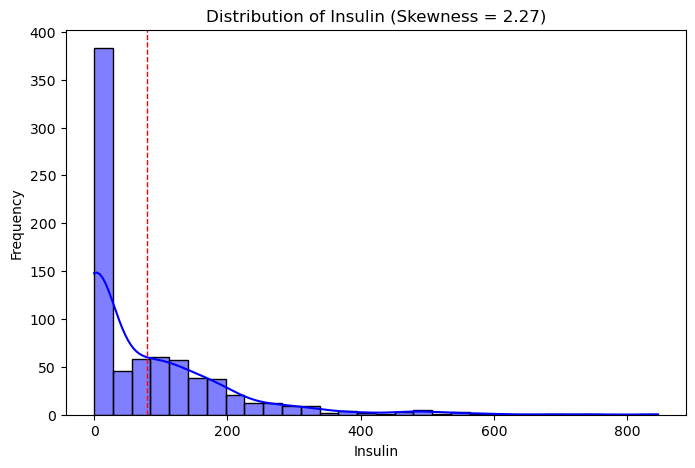

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


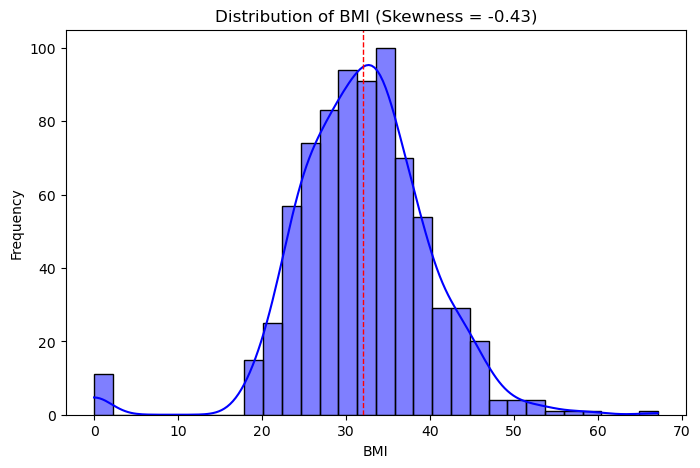

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


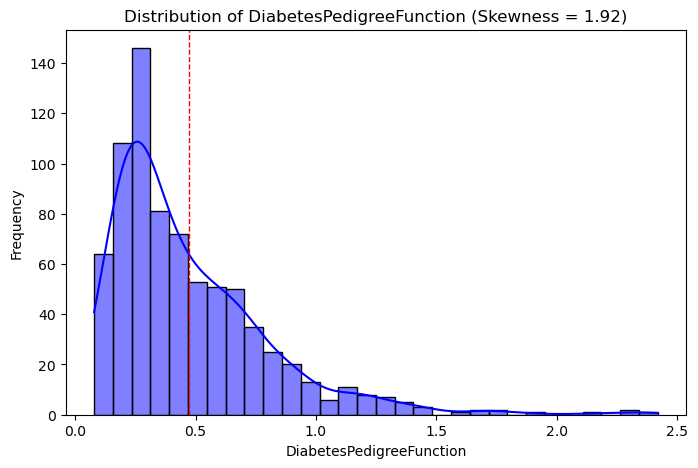

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


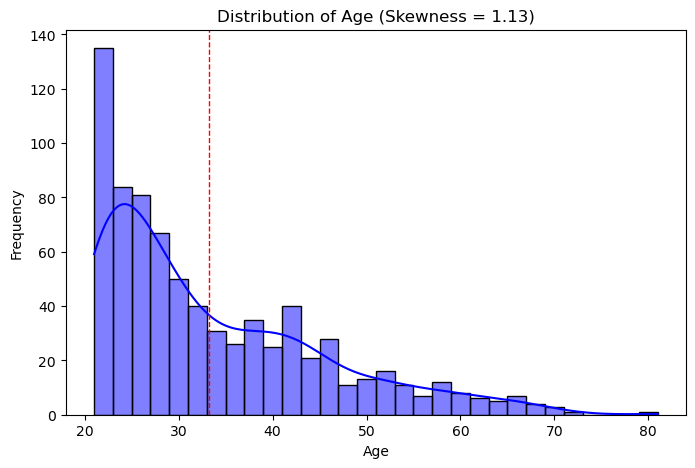

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


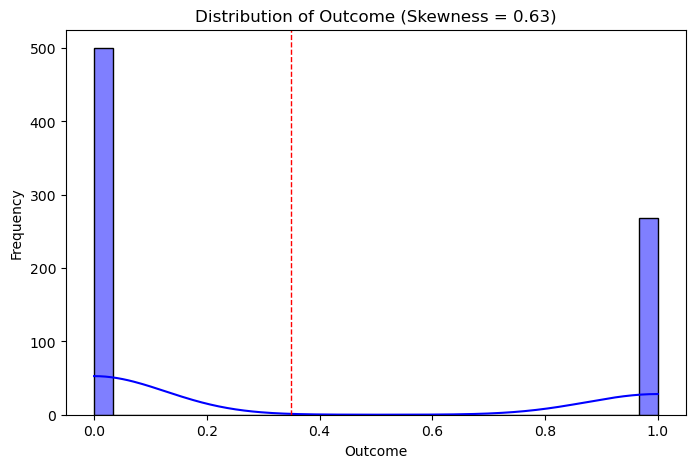

In [22]:
#Distribution plots with skewness

numeric_cols = data.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.axvline(data[col].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.title(f"Distribution of {col} (Skewness = {skew(data[col], nan_policy='omit'):.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()